In [1]:
from tqdm.notebook import tqdm
import numpy as np
import sys
sys.path.append('../')
from partitioning import is_pow_of_two, init_membership_list
from spawn import start_db_background
from structures import Params, NetworkParams
from client_dynamo import client_get, client_put, client_get_memory
from parallel_runner import run_parallel
from random import randint

import logging
logger = logging.getLogger('dynamo_node')
logger.setLevel(logging.INFO)

START_PORT = 2333
CLIENT_ID = 1

def get_start_port(randomize=True):
    return START_PORT + randint(0, params.num_proc-1) * int(randomize)

def get_stats(durations):
    if len(durations) == 0:
        return {}
    durations = np.array(durations) # convert from seconds to ms
    mean = np.mean(durations)
    std = np.std(durations)
    nnth = np.percentile(durations, 99.9)
    return {'mean': mean, 'std': std, '99.9th': nnth}

def generate_plot(durations, label='', clear=True):
    if clear:
        plt.clf()
    fig = sns.distplot(durations, label=label)
    plt.ylabel('Density')
    plt.xlabel('Response Time (in ms)')
    plt.title('Distribution of response times (in ms)')
    plt.legend()
    plt.show()

params = {
    'num_proc' : 8,
    'hash_size': 8, # 2^3 = 8 
    'Q' : 16, # 
    'N' : 4,
    'w_timeout': 2,
    'r_timeout': 2,
    'R': 1,
    'W': 3,
    'gossip': False
}
network_params = {
    'latency': 10,
    'randomize_latency': False,
    'drop_prob': 0
}

params = Params(params)
network_params = NetworkParams(network_params)
membership_information = init_membership_list(params)

16 and True
8 and True
Configuration is as follows: Key space sizes 256
Total V Nodes 16 | V Nodes Per Proc 2


In [2]:
processes_future = start_db_background(params, membership_information, network_params, wait=True, start_port=START_PORT)

Membership Info {0: [0, 10], 1: [12, 15], 2: [4, 8], 3: [1, 13], 4: [5, 11], 5: [7, 2], 6: [9, 6], 7: [14, 3]} NUmber of processes 8
0
--------Starting process with params: Loading config..
num_proc : 8
hash_size : 8
Q : 16
N : 4
w_timeout : 2
r_timeout : 2
R : 1
W : 3
gossip : False

here False
not here
------------------start Python GRPC server at localhost:2333
1
--------Starting process with params: Loading config..
num_proc : 8
hash_size : 8
Q : 16
N : 4
w_timeout : 2
r_timeout : 2
R : 1
W : 3
gossip : False

here False
not here
------------------start Python GRPC server at localhost:2334
2
--------Starting process with params: Loading config..
num_proc : 8
hash_size : 8
Q : 16
N : 4
w_timeout : 2
r_timeout : 2
R : 1
W : 3
gossip : False

here False
not here
------------------start Python GRPC server at localhost:2335
3
--------Starting process with params: Loading config..
num_proc : 8
hash_size : 8
Q : 16
N : 4
w_timeout : 2
r_timeout : 2
R : 1
W : 3
gossip : False

here False
n

In [3]:
def run_multiple_get(total, num_requests, get_durations):
    for i in tqdm(range(total // num_requests)):
        requests = [client_get]*num_requests
        requests_params = [{'port': get_start_port(), 'client_id': CLIENT_ID, 'key': randint(0, 2**params.hash_size-1)} for _ in range(num_requests)]
        get_durations = np.concatenate((get_durations, run_parallel(requests, requests_params, start_port=START_PORT)))
    return get_durations

def run_multiple_put(total, num_requests, put_durations):
    for i in tqdm(range(total // num_requests)):
        requests = [client_put]*num_requests
        k = randint(0, 2**params.hash_size-1)
        requests_params = [{'port': get_start_port(), 'client_id': CLIENT_ID, 'key': k, 'val': str(k)} for _ in range(num_requests)]
        put_durations = np.concatenate((put_durations, run_parallel(requests, requests_params, start_port=START_PORT)))
    return put_durations

def store_keys(params):
    for key in tqdm(range(2**params.hash_size)):
        client_put(get_start_port(), CLIENT_ID, key=key, val=str(key))

In [4]:
store_keys(params)

INFO:dynamo_node:[Put] called for key 0 at node 0
INFO:dynamo_node:Replicating.... key=0, val=0
INFO:dynamo_node:Tokens in pref_list are [0, 1, 2, 3], and Nodes in pref_list are [0, 3, 5, 7]
INFO:dynamo_node:[Replicate] called for key 0 at node 3
INFO:dynamo_node:[Replicate] called for key 0 at node 5
INFO:dynamo_node:[Replicate] called for key 0 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {}
INFO:dynamo_node:Put sen

INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {}
INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 7 at node 1
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 7 at node 0
INFO:dynamo_node:Replicating.... key=7, val=7
INFO:dynamo_node:Tokens in pref_list are [0, 1, 

INFO:dynamo_node:[Put] called for key 13 at node 0
INFO:dynamo_node:Replicating.... key=13, val=13
INFO:dynamo_node:Tokens in pref_list are [0, 1, 2, 3], and Nodes in pref_list are [0, 3, 5, 7]
INFO:dynamo_node:[Replicate] called for key 13 at node 3
INFO:dynamo_node:[Replicate] called for key 13 at node 5
INFO:dynamo_node:[Replicate] called for key 13 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {}
INFO:dynamo_node:P

INFO:dynamo_node:[Replicate] called for key 17 at node 7
INFO:dynamo_node:[Replicate] called for key 17 at node 5
INFO:dynamo_node:[Replicate] called for key 17 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 1
  value {
    client_id: 1
   

INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 19 at node 7
INFO:dynamo_node:[Replicate] called for key 19 at node 2
INFO:dynamo_node:[Replicate] called for key 19 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        co

INFO:dynamo_node:[Put] called for key 21 at node 3
INFO:dynamo_node:Replicating.... key=21, val=21
INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 21 at node 5
INFO:dynamo_node:[Replicate] called for key 21 at node 7
INFO:dynamo_node:[Replicate] called for key 21 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  

INFO:dynamo_node:[Put] called for key 23 at node 3
INFO:dynamo_node:Replicating.... key=23, val=23
INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 23 at node 5
INFO:dynamo_node:[Replicate] called for key 23 at node 2
INFO:dynamo_node:[Replicate] called for key 23 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  

INFO:dynamo_node:[Put] called for key 25 at node 3
INFO:dynamo_node:Replicating.... key=25, val=25
INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 25 at node 7
INFO:dynamo_node:[Replicate] called for key 25 at node 5
INFO:dynamo_node:[Replicate] called for key 25 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  

INFO:dynamo_node:[Put] called for key 27 at node 3
INFO:dynamo_node:Replicating.... key=27, val=27
INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 27 at node 5
INFO:dynamo_node:[Replicate] called for key 27 at node 2
INFO:dynamo_node:[Replicate] called for key 27 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  

INFO:dynamo_node:[Put] called for key 29 at node 3
INFO:dynamo_node:Replicating.... key=29, val=29
INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 29 at node 5
INFO:dynamo_node:[Replicate] called for key 29 at node 7
INFO:dynamo_node:[Replicate] called for key 29 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  

INFO:dynamo_node:Tokens in pref_list are [1, 2, 3, 4], and Nodes in pref_list are [3, 5, 7, 2]
INFO:dynamo_node:[Replicate] called for key 31 at node 7
INFO:dynamo_node:[Replicate] called for key 31 at node 5
INFO:dynamo_node:[Replicate] called for key 31 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        co

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 33 at node 5
INFO:dynamo_node:Replicating.... key=33, val=33
INFO:dynamo_node:Tokens in pref_list are [2, 3, 4, 5], and Nodes in pref_list are [5, 7, 2, 4]
INFO:dynamo_node:[Replicate] called for key 33 at node 2
INFO:dynamo_node:[Replicate] called for key 33 at node 7
INFO:dynamo_node:[Replicate] called for key 33 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 1
  value {
    client_id: 1
    key: 1
    val: "1"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 2
  value {
    client_id: 1
    key: 2
    val: "2"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 3
  value {
    client_id: 1
    key: 3
    val: "3"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 4
  value {
    client_id: 1
    key: 4
    val: "4"
    context {
      clock {
  

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 36 at node 5
INFO:dynamo_node:Replicating.... key=36, val=36
INFO:dynamo_node:Tokens in pref_list are [2, 3, 4, 5], and Nodes in pref_list are [5, 7, 2, 4]
INFO:dynamo_node:[Replicate] called for key 36 at node 7
INFO:dynamo_node:[Replicate] called for key 36 at node 2
INFO:dynamo_node:[Replicate] called for key 36 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 38 at node 5
INFO:dynamo_node:Replicating.... key=38, val=38
INFO:dynamo_node:Tokens in pref_list are [2, 3, 4, 5], and Nodes in pref_list are [5, 7, 2, 4]
INFO:dynamo_node:[Replicate] called for key 38 at node 2
INFO:dynamo_node:[Replicate] called for key 38 at node 7
INFO:dynamo_node:[Replicate] called for key 38 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 1
  value {
    client_id: 1
    key: 1
    val: "1"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 2
  value {
    client_id: 1
    key: 2
    val: "2"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 3
  value {
    client_id: 1
    key: 3
    val: "3"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 4
  value {
    client_id: 1
    key: 4
    val: "4"
    context {
      clock {
  

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 41 at node 0
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 41 at node 5
INFO:dynamo_node:Replicating.... key=41, val=41
INFO:dynamo_node:Tokens in pref_list are [2, 3, 4, 5], and Nodes in pref_list are [5, 7, 2, 4]
INFO:dynamo_node:[Replicate] called for key 41 at node 2
INFO:dynamo_node:[Replicate] called for key 41 at node 7
INFO:dynamo_node:[Replicate] called for key 41 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 1
  value {
    client_id: 1
    key: 1
    val: "1"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 2
  value {
    client_id: 1
    key: 2
    val: "2"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 3
  value {
    client_id: 1
    key: 3
    val: "3"
    context {
      clock {
        

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 44 at node 5
INFO:dynamo_node:Replicating.... key=44, val=44
INFO:dynamo_node:Tokens in pref_list are [2, 3, 4, 5], and Nodes in pref_list are [5, 7, 2, 4]
INFO:dynamo_node:[Replicate] called for key 44 at node 2
INFO:dynamo_node:[Replicate] called for key 44 at node 7
INFO:dynamo_node:[Replicate] called for key 44 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 1
  value {
    client_id: 1
    key: 1
    val: "1"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 2
  value {
    client_id: 1
    key: 2
    val: "2"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 3
  value {
    client_id: 1
    key: 3
    val: "3"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 4
  value {
    client_id: 1
    key: 4
    val: "4"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
 

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 47 at node 3
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 47 at node 5
INFO:dynamo_node:Replicating.... key=47, val=47
INFO:dynamo_node:Tokens in pref_list are [2, 3, 4, 5], and Nodes in pref_list are [5, 7, 2, 4]
INFO:dynamo_node:[Replicate] called for key 47 at node 7
INFO:dynamo_node:[Replicate] called for key 47 at node 2
INFO:dynamo_node:[Replicate] called for key 47 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps finally 4 Failure > False, should we wait some more ?
INFO:dynamo_node:Replication done ! {0: mem {
  key: 0
  value {
    client_id: 1
    val: "0"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 1
  value {
    client_id: 1
    key: 1
    val: "1"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 2
  value {
    client_id: 1
    key: 2
    val: "2"
    context {
      clock {
        server_id: "0"
        count: 1
      }
    }
    hinted_handoff: -1
  }
}
mem {
  key: 3
  value {
    client_id: 1
    key: 3
    val: "3"
    context {
      clock {
        

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 49 at node 0
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 49 at node 7
INFO:dynamo_node:Replicating.... key=49, val=49
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 49 at node 4
INFO:dynamo_node:[Replicate] called for key 49 at node 6
INFO:dynamo_node:[Replicate] called for key 49 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 50 at node 0
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 50 at node 7
INFO:dynamo_node:Replicating.... key=50, val=50
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 50 at node 2
INFO:dynamo_node:[Replicate] called for key 50 at node 4
INFO:dynamo_node:[Replicate] called for key 50 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 51 at node 7
INFO:dynamo_node:Replicating.... key=51, val=51
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 51 at node 2
INFO:dynamo_node:[Replicate] called for key 51 at node 4
INFO:dynamo_node:[Replicate] called for key 51 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 52 at node 5
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 52 at node 7
INFO:dynamo_node:Replicating.... key=52, val=52
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 52 at node 2
INFO:dynamo_node:[Replicate] called for key 52 at node 6
INFO:dynamo_node:[Replicate] called for key 52 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 53 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 53 at node 7
INFO:dynamo_node:Replicating.... key=53, val=53
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 53 at node 4
INFO:dynamo_node:[Replicate] called for key 53 at node 2
INFO:dynamo_node:[Replicate] called for key 53 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 54 at node 1
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 54 at node 7
INFO:dynamo_node:Replicating.... key=54, val=54
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 54 at node 2
INFO:dynamo_node:[Replicate] called for key 54 at node 4
INFO:dynamo_node:[Replicate] called for key 54 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 55 at node 3
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 55 at node 7
INFO:dynamo_node:Replicating.... key=55, val=55
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 55 at node 2
INFO:dynamo_node:[Replicate] called for key 55 at node 6
INFO:dynamo_node:[Replicate] called for key 55 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 56 at node 2
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 56 at node 7
INFO:dynamo_node:Replicating.... key=56, val=56
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 56 at node 2
INFO:dynamo_node:[Replicate] called for key 56 at node 4
INFO:dynamo_node:[Replicate] called for key 56 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 57 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 57 at node 7
INFO:dynamo_node:Replicating.... key=57, val=57
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 57 at node 2
INFO:dynamo_node:[Replicate] called for key 57 at node 6
INFO:dynamo_node:[Replicate] called for key 57 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 58 at node 5
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 58 at node 7
INFO:dynamo_node:Replicating.... key=58, val=58
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 58 at node 4
INFO:dynamo_node:[Replicate] called for key 58 at node 2
INFO:dynamo_node:[Replicate] called for key 58 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 59 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 59 at node 7
INFO:dynamo_node:Replicating.... key=59, val=59
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 59 at node 2
INFO:dynamo_node:[Replicate] called for key 59 at node 6
INFO:dynamo_node:[Replicate] called for key 59 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 60 at node 2
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 60 at node 7
INFO:dynamo_node:Replicating.... key=60, val=60
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 60 at node 2
INFO:dynamo_node:[Replicate] called for key 60 at node 4
INFO:dynamo_node:[Replicate] called for key 60 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INF

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 61 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 61 at node 7
INFO:dynamo_node:Replicating.... key=61, val=61
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 61 at node 2
INFO:dynamo_node:[Replicate] called for key 61 at node 4
INFO:dynamo_node:[Replicate] called for key 61 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 62 at node 3
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 62 at node 7
INFO:dynamo_node:Replicating.... key=62, val=62
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 62 at node 4
INFO:dynamo_node:[Replicate] called for key 62 at node 6
INFO:dynamo_node:[Replicate] called for key 62 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 63 at node 4
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 63 at node 7
INFO:dynamo_node:Replicating.... key=63, val=63
INFO:dynamo_node:Tokens in pref_list are [3, 4, 5, 6], and Nodes in pref_list are [7, 2, 4, 6]
INFO:dynamo_node:[Replicate] called for key 63 at node 2
INFO:dynamo_node:[Replicate] called for key 63 at node 4
INFO:dynamo_node:[Replicate] called for key 63 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 64 at node 3
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 64 at node 2
INFO:dynamo_node:Replicating.... key=64, val=64
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 64 at node 4
INFO:dynamo_node:[Replicate] called for key 64 at node 6
INFO:dynamo_node:[Replicate] called for key 64 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 65 at node 6
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 65 at node 2
INFO:dynamo_node:Replicating.... key=65, val=65
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 65 at node 5
INFO:dynamo_node:[Replicate] called for key 65 at node 4
INFO:dynamo_node:[Replicate] called for key 65 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 66 at node 7
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 66 at node 2
INFO:dynamo_node:Replicating.... key=66, val=66
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 66 at node 4
INFO:dynamo_node:[Replicate] called for key 66 at node 6
INFO:dynamo_node:[Replicate] called for key 66 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 67 at node 5
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 67 at node 2
INFO:dynamo_node:Replicating.... key=67, val=67
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 67 at node 6
INFO:dynamo_node:[Replicate] called for key 67 at node 4
INFO:dynamo_node:[Replicate] called for key 67 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 68 at node 6
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 68 at node 2
INFO:dynamo_node:Replicating.... key=68, val=68
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 68 at node 6
INFO:dynamo_node:[Replicate] called for key 68 at node 4
INFO:dynamo_node:[Replicate] called for key 68 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 69 at node 7
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 69 at node 2
INFO:dynamo_node:Replicating.... key=69, val=69
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 69 at node 6
INFO:dynamo_node:[Replicate] called for key 69 at node 4
INFO:dynamo_node:[Replicate] called for key 69 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 70 at node 2
INFO:dynamo_node:Replicating.... key=70, val=70
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 70 at node 4
INFO:dynamo_node:[Replicate] called for key 70 at node 5
INFO:dynamo_node:[Replicate] called for key 70 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 71 at node 0
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 71 at node 2
INFO:dynamo_node:Replicating.... key=71, val=71
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 71 at node 6
INFO:dynamo_node:[Replicate] called for key 71 at node 4
INFO:dynamo_node:[Replicate] called for key 71 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 72 at node 0
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 72 at node 2
INFO:dynamo_node:Replicating.... key=72, val=72
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 72 at node 6
INFO:dynamo_node:[Replicate] called for key 72 at node 4
INFO:dynamo_node:[Replicate] called for key 72 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 73 at node 5
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 73 at node 2
INFO:dynamo_node:Replicating.... key=73, val=73
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 73 at node 4
INFO:dynamo_node:[Replicate] called for key 73 at node 5
INFO:dynamo_node:[Replicate] called for key 73 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put request has bee

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 74 at node 2
INFO:dynamo_node:Replicating.... key=74, val=74
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 74 at node 5
INFO:dynamo_node:[Replicate] called for key 74 at node 4
INFO:dynamo_node:[Replicate] called for key 74 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 75 at node 2
INFO:dynamo_node:Replicating.... key=75, val=75
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 75 at node 4
INFO:dynamo_node:[Replicate] called for key 75 at node 6
INFO:dynamo_node:[Replicate] called for key 75 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 76 at node 5
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 76 at node 2
INFO:dynamo_node:Replicating.... key=76, val=76
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 76 at node 4
INFO:dynamo_node:[Replicate] called for key 76 at node 6
INFO:dynamo_node:[Replicate] called for key 76 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 77 at node 2
INFO:dynamo_node:Replicating.... key=77, val=77
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 77 at node 5
INFO:dynamo_node:[Replicate] called for key 77 at node 4
INFO:dynamo_node:[Replicate] called for key 77 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 78 at node 7
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 78 at node 2
INFO:dynamo_node:Replicating.... key=78, val=78
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 78 at node 5
INFO:dynamo_node:[Replicate] called for key 78 at node 4
INFO:dynamo_node:[Replicate] called for key 78 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 79 at node 6
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 79 at node 2
INFO:dynamo_node:Replicating.... key=79, val=79
INFO:dynamo_node:Tokens in pref_list are [4, 5, 6, 7], and Nodes in pref_list are [2, 4, 6, 5]
INFO:dynamo_node:[Replicate] called for key 79 at node 4
INFO:dynamo_node:[Replicate] called for key 79 at node 6
INFO:dynamo_node:[Replicate] called for key 79 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 80 at node 0
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 80 at node 4
INFO:dynamo_node:Replicating.... key=80, val=80
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 80 at node 5
INFO:dynamo_node:[Replicate] called for key 80 at node 6
INFO:dynamo_node:[Replicate] called for key 80 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 81 at node 1
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 81 at node 4
INFO:dynamo_node:Replicating.... key=81, val=81
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 81 at node 5
INFO:dynamo_node:[Replicate] called for key 81 at node 6
INFO:dynamo_node:[Replicate] called for key 81 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INF

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 82 at node 6
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 82 at node 4
INFO:dynamo_node:Replicating.... key=82, val=82
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 82 at node 5
INFO:dynamo_node:[Replicate] called for key 82 at node 6
INFO:dynamo_node:[Replicate] called for key 82 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 83 at node 1
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 83 at node 4
INFO:dynamo_node:Replicating.... key=83, val=83
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 83 at node 6
INFO:dynamo_node:[Replicate] called for key 83 at node 5
INFO:dynamo_node:[Replicate] called for key 83 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 84 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 84 at node 4
INFO:dynamo_node:Replicating.... key=84, val=84
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 84 at node 2
INFO:dynamo_node:[Replicate] called for key 84 at node 5
INFO:dynamo_node:[Replicate] called for key 84 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 85 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 85 at node 4
INFO:dynamo_node:Replicating.... key=85, val=85
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 85 at node 6
INFO:dynamo_node:[Replicate] called for key 85 at node 5
INFO:dynamo_node:[Replicate] called for key 85 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 86 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 86 at node 4
INFO:dynamo_node:Replicating.... key=86, val=86
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 86 at node 5
INFO:dynamo_node:[Replicate] called for key 86 at node 6
INFO:dynamo_node:[Replicate] called for key 86 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 87 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 87 at node 4
INFO:dynamo_node:Replicating.... key=87, val=87
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 87 at node 2
INFO:dynamo_node:[Replicate] called for key 87 at node 6
INFO:dynamo_node:[Replicate] called for key 87 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 88 at node 0
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 88 at node 4
INFO:dynamo_node:Replicating.... key=88, val=88
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 88 at node 6
INFO:dynamo_node:[Replicate] called for key 88 at node 2
INFO:dynamo_node:[Replicate] called for key 88 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes t

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 89 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 89 at node 4
INFO:dynamo_node:Replicating.... key=89, val=89
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 89 at node 6
INFO:dynamo_node:[Replicate] called for key 89 at node 2
INFO:dynamo_node:[Replicate] called for key 89 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 90 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 90 at node 4
INFO:dynamo_node:Replicating.... key=90, val=90
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 90 at node 5
INFO:dynamo_node:[Replicate] called for key 90 at node 6
INFO:dynamo_node:[Replicate] called for key 90 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 91 at node 4
INFO:dynamo_node:Replicating.... key=91, val=91
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 91 at node 5
INFO:dynamo_node:[Replicate] called for key 91 at node 2
INFO:dynamo_node:[Replicate] called for key 91 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd r

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 92 at node 0
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 92 at node 4
INFO:dynamo_node:Replicating.... key=92, val=92
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 92 at node 6
INFO:dynamo_node:[Replicate] called for key 92 at node 5
INFO:dynamo_node:[Replicate] called for key 92 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes t

}
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 93 at node 6
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 93 at node 4
INFO:dynamo_node:Replicating.... key=93, val=93
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 93 at node 5
INFO:dynamo_node:[Replicate] called for key 93 at node 6
INFO:dynamo_node:[Replicate] called for key 93 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

}
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 94 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 94 at node 4
INFO:dynamo_node:Replicating.... key=94, val=94
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 94 at node 6
INFO:dynamo_node:[Replicate] called for key 94 at node 5
INFO:dynamo_node:[Replicate] called for key 94 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 95 at node 3
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 95 at node 4
INFO:dynamo_node:Replicating.... key=95, val=95
INFO:dynamo_node:Tokens in pref_list are [5, 6, 7, 8], and Nodes in pref_list are [4, 6, 5, 2]
INFO:dynamo_node:[Replicate] called for key 95 at node 6
INFO:dynamo_node:[Replicate] called for key 95 at node 5
INFO:dynamo_node:[Replicate] called for key 95 at node 2
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

}
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 96 at node 7
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 96 at node 6
INFO:dynamo_node:Replicating.... key=96, val=96
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 96 at node 5
INFO:dynamo_node:[Replicate] called for key 96 at node 2
INFO:dynamo_node:[Replicate] called for key 96 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put request has 

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 97 at node 1
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 97 at node 6
INFO:dynamo_node:Replicating.... key=97, val=97
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 97 at node 5
INFO:dynamo_node:[Replicate] called for key 97 at node 2
INFO:dynamo_node:[Replicate] called for key 97 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 98 at node 2
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 98 at node 6
INFO:dynamo_node:Replicating.... key=98, val=98
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 98 at node 5
INFO:dynamo_node:[Replicate] called for key 98 at node 2
INFO:dynamo_node:[Replicate] called for key 98 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 99 at node 5
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 99 at node 6
INFO:dynamo_node:Replicating.... key=99, val=99
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 99 at node 5
INFO:dynamo_node:[Replicate] called for key 99 at node 2
INFO:dynamo_node:[Replicate] called for key 99 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 100 at node 0
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 100 at node 6
INFO:dynamo_node:Replicating.... key=100, val=100
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 100 at node 5
INFO:dynamo_node:[Replicate] called for key 100 at node 2
INFO:dynamo_node:[Replicate] called for key 100 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 101 at node 4
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 101 at node 6
INFO:dynamo_node:Replicating.... key=101, val=101
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 101 at node 5
INFO:dynamo_node:[Replicate] called for key 101 at node 2
INFO:dynamo_node:[Replicate] called for key 101 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 102 at node 2
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 102 at node 6
INFO:dynamo_node:Replicating.... key=102, val=102
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 102 at node 5
INFO:dynamo_node:[Replicate] called for key 102 at node 2
INFO:dynamo_node:[Replicate] called for key 102 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 103 at node 2
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 103 at node 6
INFO:dynamo_node:Replicating.... key=103, val=103
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 103 at node 5
INFO:dynamo_node:[Replicate] called for key 103 at node 2
INFO:dynamo_node:[Replicate] called for key 103 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 104 at node 4
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 104 at node 6
INFO:dynamo_node:Replicating.... key=104, val=104
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 104 at node 5
INFO:dynamo_node:[Replicate] called for key 104 at node 2
INFO:dynamo_node:[Replicate] called for key 104 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put request

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 105 at node 0
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 105 at node 6
INFO:dynamo_node:Replicating.... key=105, val=105
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 105 at node 5
INFO:dynamo_node:[Replicate] called for key 105 at node 2
INFO:dynamo_node:[Replicate] called for key 105 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 106 at node 5
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 106 at node 6
INFO:dynamo_node:Replicating.... key=106, val=106
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 106 at node 5
INFO:dynamo_node:[Replicate] called for key 106 at node 2
INFO:dynamo_node:[Replicate] called for key 106 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 107 at node 4
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 107 at node 6
INFO:dynamo_node:Replicating.... key=107, val=107
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 107 at node 5
INFO:dynamo_node:[Replicate] called for key 107 at node 2
INFO:dynamo_node:[Replicate] called for key 107 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 108 at node 1
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 108 at node 6
INFO:dynamo_node:Replicating.... key=108, val=108
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 108 at node 5
INFO:dynamo_node:[Replicate] called for key 108 at node 2
INFO:dynamo_node:[Replicate] called for key 108 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynam

}
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 109 at node 0
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 109 at node 6
INFO:dynamo_node:Replicating.... key=109, val=109
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 109 at node 5
INFO:dynamo_node:[Replicate] called for key 109 at node 2
INFO:dynamo_node:[Replicate] called for key 109 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 110 at node 6
INFO:dynamo_node:Replicating.... key=110, val=110
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 110 at node 5
INFO:dynamo_node:[Replicate] called for key 110 at node 2
INFO:dynamo_node:[Replicate] called for key 110 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Compl

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 111 at node 3
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 111 at node 6
INFO:dynamo_node:Replicating.... key=111, val=111
INFO:dynamo_node:Tokens in pref_list are [6, 7, 8, 10], and Nodes in pref_list are [6, 5, 2, 0]
INFO:dynamo_node:[Replicate] called for key 111 at node 5
INFO:dynamo_node:[Replicate] called for key 111 at node 2
INFO:dynamo_node:[Replicate] called for key 111 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 5
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 112 at node 0
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 112 at node 5
INFO:dynamo_node:Replicating.... key=112, val=112
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 112 at node 6
INFO:dynamo_node:[Replicate] called for key 112 at node 2
INFO:dynamo_node:[Replicate] called for key 112 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 113 at node 6
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 113 at node 5
INFO:dynamo_node:Replicating.... key=113, val=113
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 113 at node 6
INFO:dynamo_node:[Replicate] called for key 113 at node 2
INFO:dynamo_node:[Replicate] called for key 113 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated 

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 114 at node 7
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 114 at node 5
INFO:dynamo_node:Replicating.... key=114, val=114
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 114 at node 2
INFO:dynamo_node:[Replicate] called for key 114 at node 6
INFO:dynamo_node:[Replicate] called for key 114 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 115 at node 2
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 115 at node 5
INFO:dynamo_node:Replicating.... key=115, val=115
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 115 at node 6
INFO:dynamo_node:[Replicate] called for key 115 at node 2
INFO:dynamo_node:[Replicate] called for key 115 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 116 at node 0
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 116 at node 5
INFO:dynamo_node:Replicating.... key=116, val=116
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 116 at node 2
INFO:dynamo_node:[Replicate] called for key 116 at node 6
INFO:dynamo_node:[Replicate] called for key 116 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 117 at node 1
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 117 at node 5
INFO:dynamo_node:Replicating.... key=117, val=117
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 117 at node 2
INFO:dynamo_node:[Replicate] called for key 117 at node 6
INFO:dynamo_node:[Replicate] called for key 117 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 118 at node 5
INFO:dynamo_node:Replicating.... key=118, val=118
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 118 at node 2
INFO:dynamo_node:[Replicate] called for key 118 at node 6
INFO:dynamo_node:[Replicate] called for key 118 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Compl

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 119 at node 4
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 119 at node 5
INFO:dynamo_node:Replicating.... key=119, val=119
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 119 at node 2
INFO:dynamo_node:[Replicate] called for key 119 at node 6
INFO:dynamo_node:[Replicate] called for key 119 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 120 at node 4
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 120 at node 5
INFO:dynamo_node:Replicating.... key=120, val=120
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 120 at node 6
INFO:dynamo_node:[Replicate] called for key 120 at node 2
INFO:dynamo_node:[Replicate] called for key 120 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 121 at node 1
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 121 at node 5
INFO:dynamo_node:Replicating.... key=121, val=121
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 121 at node 2
INFO:dynamo_node:[Replicate] called for key 121 at node 6
INFO:dynamo_node:[Replicate] called for key 121 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 122 at node 1
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 122 at node 5
INFO:dynamo_node:Replicating.... key=122, val=122
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 122 at node 2
INFO:dynamo_node:[Replicate] called for key 122 at node 6
INFO:dynamo_node:[Replicate] called for key 122 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 123 at node 7
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 123 at node 5
INFO:dynamo_node:Replicating.... key=123, val=123
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 123 at node 2
INFO:dynamo_node:[Replicate] called for key 123 at node 6
INFO:dynamo_node:[Replicate] called for key 123 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 124 at node 4
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 124 at node 5
INFO:dynamo_node:Replicating.... key=124, val=124
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 124 at node 6
INFO:dynamo_node:[Replicate] called for key 124 at node 2
INFO:dynamo_node:[Replicate] called for key 124 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 125 at node 0
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 125 at node 5
INFO:dynamo_node:Replicating.... key=125, val=125
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 125 at node 2
INFO:dynamo_node:[Replicate] called for key 125 at node 6
INFO:dynamo_node:[Replicate] called for key 125 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put request has been suc

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 126 at node 5
INFO:dynamo_node:Replicating.... key=126, val=126
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 126 at node 2
INFO:dynamo_node:[Replicate] called for key 126 at node 6
INFO:dynamo_node:[Replicate] called for key 126 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 2
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Compl

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 127 at node 1
INFO:dynamo_node:Rerouting to 2338...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2338

INFO:dynamo_node:[Put] called for key 127 at node 5
INFO:dynamo_node:Replicating.... key=127, val=127
INFO:dynamo_node:Tokens in pref_list are [7, 8, 9, 10], and Nodes in pref_list are [5, 2, 6, 0]
INFO:dynamo_node:[Replicate] called for key 127 at node 2
INFO:dynamo_node:[Replicate] called for key 127 at node 6
INFO:dynamo_node:[Replicate] called for key 127 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 128 at node 3
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 128 at node 2
INFO:dynamo_node:Replicating.... key=128, val=128
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 128 at node 0
INFO:dynamo_node:[Replicate] called for key 128 at node 6
INFO:dynamo_node:[Replicate] called for key 128 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 129 at node 1
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 129 at node 2
INFO:dynamo_node:Replicating.... key=129, val=129
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 129 at node 4
INFO:dynamo_node:[Replicate] called for key 129 at node 0
INFO:dynamo_node:[Replicate] called for key 129 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 130 at node 6
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 130 at node 2
INFO:dynamo_node:Replicating.... key=130, val=130
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 130 at node 6
INFO:dynamo_node:[Replicate] called for key 130 at node 0
INFO:dynamo_node:[Replicate] called for key 130 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 131 at node 5
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 131 at node 2
INFO:dynamo_node:Replicating.... key=131, val=131
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 131 at node 0
INFO:dynamo_node:[Replicate] called for key 131 at node 6
INFO:dynamo_node:[Replicate] called for key 131 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 132 at node 6
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 132 at node 2
INFO:dynamo_node:Replicating.... key=132, val=132
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 132 at node 0
INFO:dynamo_node:[Replicate] called for key 132 at node 6
INFO:dynamo_node:[Replicate] called for key 132 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 133 at node 1
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 133 at node 2
INFO:dynamo_node:Replicating.... key=133, val=133
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 133 at node 6
INFO:dynamo_node:[Replicate] called for key 133 at node 0
INFO:dynamo_node:[Replicate] called for key 133 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 134 at node 1
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 134 at node 2
INFO:dynamo_node:Replicating.... key=134, val=134
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 134 at node 6
INFO:dynamo_node:[Replicate] called for key 134 at node 4
INFO:dynamo_node:[Replicate] called for key 134 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 135 at node 5
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 135 at node 2
INFO:dynamo_node:Replicating.... key=135, val=135
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 135 at node 4
INFO:dynamo_node:[Replicate] called for key 135 at node 6
INFO:dynamo_node:[Replicate] called for key 135 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 136 at node 1
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 136 at node 2
INFO:dynamo_node:Replicating.... key=136, val=136
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 136 at node 6
INFO:dynamo_node:[Replicate] called for key 136 at node 0
INFO:dynamo_node:[Replicate] called for key 136 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 137 at node 0
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 137 at node 2
INFO:dynamo_node:Replicating.... key=137, val=137
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 137 at node 0
INFO:dynamo_node:[Replicate] called for key 137 at node 6
INFO:dynamo_node:[Replicate] called for key 137 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 138 at node 3
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 138 at node 2
INFO:dynamo_node:Replicating.... key=138, val=138
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 138 at node 0
INFO:dynamo_node:[Replicate] called for key 138 at node 4
INFO:dynamo_node:[Replicate] called for key 138 at node 6
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 139 at node 7
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 139 at node 2
INFO:dynamo_node:Replicating.... key=139, val=139
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 139 at node 6
INFO:dynamo_node:[Replicate] called for key 139 at node 0
INFO:dynamo_node:[Replicate] called for key 139 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 140 at node 1
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 140 at node 2
INFO:dynamo_node:Replicating.... key=140, val=140
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 140 at node 6
INFO:dynamo_node:[Replicate] called for key 140 at node 4
INFO:dynamo_node:[Replicate] called for key 140 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

}
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 141 at node 6
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 141 at node 2
INFO:dynamo_node:Replicating.... key=141, val=141
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 141 at node 6
INFO:dynamo_node:[Replicate] called for key 141 at node 0
INFO:dynamo_node:[Replicate] called for key 141 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 142 at node 7
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 142 at node 2
INFO:dynamo_node:Replicating.... key=142, val=142
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 142 at node 6
INFO:dynamo_node:[Replicate] called for key 142 at node 0
INFO:dynamo_node:[Replicate] called for key 142 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 143 at node 5
INFO:dynamo_node:Rerouting to 2335...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2335

INFO:dynamo_node:[Put] called for key 143 at node 2
INFO:dynamo_node:Replicating.... key=143, val=143
INFO:dynamo_node:Tokens in pref_list are [8, 9, 10, 11], and Nodes in pref_list are [2, 6, 0, 4]
INFO:dynamo_node:[Replicate] called for key 143 at node 6
INFO:dynamo_node:[Replicate] called for key 143 at node 0
INFO:dynamo_node:[Replicate] called for key 143 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 6
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 144 at node 4
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 144 at node 6
INFO:dynamo_node:Replicating.... key=144, val=144
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 144 at node 0
INFO:dynamo_node:[Replicate] called for key 144 at node 4
INFO:dynamo_node:[Replicate] called for key 144 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 145 at node 0
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 145 at node 6
INFO:dynamo_node:Replicating.... key=145, val=145
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 145 at node 0
INFO:dynamo_node:[Replicate] called for key 145 at node 4
INFO:dynamo_node:[Replicate] called for key 145 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 146 at node 3
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 146 at node 6
INFO:dynamo_node:Replicating.... key=146, val=146
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 146 at node 0
INFO:dynamo_node:[Replicate] called for key 146 at node 1
INFO:dynamo_node:[Replicate] called for key 146 at node 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 147 at node 2
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 147 at node 6
INFO:dynamo_node:Replicating.... key=147, val=147
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 147 at node 0
INFO:dynamo_node:[Replicate] called for key 147 at node 4
INFO:dynamo_node:[Replicate] called for key 147 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 148 at node 0
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 148 at node 6
INFO:dynamo_node:Replicating.... key=148, val=148
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 148 at node 4
INFO:dynamo_node:[Replicate] called for key 148 at node 0
INFO:dynamo_node:[Replicate] called for key 148 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 149 at node 6
INFO:dynamo_node:Replicating.... key=149, val=149
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 149 at node 0
INFO:dynamo_node:[Replicate] called for key 149 at node 4
INFO:dynamo_node:[Replicate] called for key 149 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 150 at node 4
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 150 at node 6
INFO:dynamo_node:Replicating.... key=150, val=150
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 150 at node 4
INFO:dynamo_node:[Replicate] called for key 150 at node 0
INFO:dynamo_node:[Replicate] called for key 150 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put reque

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 151 at node 7
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 151 at node 6
INFO:dynamo_node:Replicating.... key=151, val=151
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 151 at node 0
INFO:dynamo_node:[Replicate] called for key 151 at node 4
INFO:dynamo_node:[Replicate] called for key 151 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 152 at node 1
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 152 at node 6
INFO:dynamo_node:Replicating.... key=152, val=152
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 152 at node 4
INFO:dynamo_node:[Replicate] called for key 152 at node 0
INFO:dynamo_node:[Replicate] called for key 152 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 153 at node 1
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 153 at node 6
INFO:dynamo_node:Replicating.... key=153, val=153
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 153 at node 0
INFO:dynamo_node:[Replicate] called for key 153 at node 4
INFO:dynamo_node:[Replicate] called for key 153 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicate

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 154 at node 5
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 154 at node 6
INFO:dynamo_node:Replicating.... key=154, val=154
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 154 at node 0
INFO:dynamo_node:[Replicate] called for key 154 at node 4
INFO:dynamo_node:[Replicate] called for key 154 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 155 at node 3
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 155 at node 6
INFO:dynamo_node:Replicating.... key=155, val=155
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 155 at node 0
INFO:dynamo_node:[Replicate] called for key 155 at node 4
INFO:dynamo_node:[Replicate] called for key 155 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 156 at node 6
INFO:dynamo_node:Replicating.... key=156, val=156
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 156 at node 0
INFO:dynamo_node:[Replicate] called for key 156 at node 4
INFO:dynamo_node:[Replicate] called for key 156 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 157 at node 3
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 157 at node 6
INFO:dynamo_node:Replicating.... key=157, val=157
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 157 at node 4
INFO:dynamo_node:[Replicate] called for key 157 at node 0
INFO:dynamo_node:[Replicate] called for key 157 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 158 at node 5
INFO:dynamo_node:Rerouting to 2339...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2339

INFO:dynamo_node:[Put] called for key 158 at node 6
INFO:dynamo_node:Replicating.... key=158, val=158
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 158 at node 0
INFO:dynamo_node:[Replicate] called for key 158 at node 4
INFO:dynamo_node:[Replicate] called for key 158 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 159 at node 6
INFO:dynamo_node:Replicating.... key=159, val=159
INFO:dynamo_node:Tokens in pref_list are [9, 10, 11, 12], and Nodes in pref_list are [6, 0, 4, 1]
INFO:dynamo_node:[Replicate] called for key 159 at node 0
INFO:dynamo_node:[Replicate] called for key 159 at node 4
INFO:dynamo_node:[Replicate] called for key 159 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

}
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 160 at node 1
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 160 at node 0
INFO:dynamo_node:Replicating.... key=160, val=160
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 160 at node 4
INFO:dynamo_node:[Replicate] called for key 160 at node 3
INFO:dynamo_node:[Replicate] called for key 160 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put re

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 161 at node 0
INFO:dynamo_node:Replicating.... key=161, val=161
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 161 at node 4
INFO:dynamo_node:[Replicate] called for key 161 at node 3
INFO:dynamo_node:[Replicate] called for key 161 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps

}
INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 162 at node 7
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 162 at node 0
INFO:dynamo_node:Replicating.... key=162, val=162
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 162 at node 4
INFO:dynamo_node:[Replicate] called for key 162 at node 1
INFO:dynamo_node:[Replicate] called for key 162 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 163 at node 4
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 163 at node 0
INFO:dynamo_node:Replicating.... key=163, val=163
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 163 at node 4
INFO:dynamo_node:[Replicate] called for key 163 at node 1
INFO:dynamo_node:[Replicate] called for key 163 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 164 at node 1
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 164 at node 0
INFO:dynamo_node:Replicating.... key=164, val=164
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 164 at node 1
INFO:dynamo_node:[Replicate] called for key 164 at node 4
INFO:dynamo_node:[Replicate] called for key 164 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 165 at node 3
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 165 at node 0
INFO:dynamo_node:Replicating.... key=165, val=165
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 165 at node 1
INFO:dynamo_node:[Replicate] called for key 165 at node 4
INFO:dynamo_node:[Replicate] called for key 165 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

}
INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 166 at node 5
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 166 at node 0
INFO:dynamo_node:Replicating.... key=166, val=166
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 166 at node 4
INFO:dynamo_node:[Replicate] called for key 166 at node 1
INFO:dynamo_node:[Replicate] called for key 166 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 167 at node 6
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 167 at node 0
INFO:dynamo_node:Replicating.... key=167, val=167
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 167 at node 4
INFO:dynamo_node:[Replicate] called for key 167 at node 1
INFO:dynamo_node:[Replicate] called for key 167 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 168 at node 2
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 168 at node 0
INFO:dynamo_node:Replicating.... key=168, val=168
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 168 at node 4
INFO:dynamo_node:[Replicate] called for key 168 at node 1
INFO:dynamo_node:[Replicate] called for key 168 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:

}
INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 169 at node 7
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 169 at node 0
INFO:dynamo_node:Replicating.... key=169, val=169
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 169 at node 4
INFO:dynamo_node:[Replicate] called for key 169 at node 1
INFO:dynamo_node:[Replicate] called for key 169 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:I

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 170 at node 5
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 170 at node 0
INFO:dynamo_node:Replicating.... key=170, val=170
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 170 at node 4
INFO:dynamo_node:[Replicate] called for key 170 at node 3
INFO:dynamo_node:[Replicate] called for key 170 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 171 at node 5
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 171 at node 0
INFO:dynamo_node:Replicating.... key=171, val=171
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 171 at node 1
INFO:dynamo_node:[Replicate] called for key 171 at node 4
INFO:dynamo_node:[Replicate] called for key 171 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 172 at node 4
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 172 at node 0
INFO:dynamo_node:Replicating.... key=172, val=172
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 172 at node 4
INFO:dynamo_node:[Replicate] called for key 172 at node 1
INFO:dynamo_node:[Replicate] called for key 172 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 173 at node 4
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 173 at node 0
INFO:dynamo_node:Replicating.... key=173, val=173
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 173 at node 4
INFO:dynamo_node:[Replicate] called for key 173 at node 1
INFO:dynamo_node:[Replicate] called for key 173 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 174 at node 0
INFO:dynamo_node:Replicating.... key=174, val=174
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 174 at node 4
INFO:dynamo_node:[Replicate] called for key 174 at node 1
INFO:dynamo_node:[Replicate] called for key 174 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Completetd reps

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 175 at node 2
INFO:dynamo_node:Rerouting to 2333...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2333

INFO:dynamo_node:[Put] called for key 175 at node 0
INFO:dynamo_node:Replicating.... key=175, val=175
INFO:dynamo_node:Tokens in pref_list are [10, 11, 12, 13], and Nodes in pref_list are [0, 4, 1, 3]
INFO:dynamo_node:[Replicate] called for key 175 at node 4
INFO:dynamo_node:[Replicate] called for key 175 at node 1
INFO:dynamo_node:[Replicate] called for key 175 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 176 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 176 at node 4
INFO:dynamo_node:Replicating.... key=176, val=176
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 176 at node 1
INFO:dynamo_node:[Replicate] called for key 176 at node 3
INFO:dynamo_node:[Replicate] called for key 176 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 177 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 177 at node 4
INFO:dynamo_node:Replicating.... key=177, val=177
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 177 at node 3
INFO:dynamo_node:[Replicate] called for key 177 at node 1
INFO:dynamo_node:[Replicate] called for key 177 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 178 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 178 at node 4
INFO:dynamo_node:Replicating.... key=178, val=178
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 178 at node 1
INFO:dynamo_node:[Replicate] called for key 178 at node 3
INFO:dynamo_node:[Replicate] called for key 178 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 179 at node 1
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 179 at node 4
INFO:dynamo_node:Replicating.... key=179, val=179
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 179 at node 3
INFO:dynamo_node:[Replicate] called for key 179 at node 1
INFO:dynamo_node:[Replicate] called for key 179 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 180 at node 1
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 180 at node 4
INFO:dynamo_node:Replicating.... key=180, val=180
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 180 at node 1
INFO:dynamo_node:[Replicate] called for key 180 at node 3
INFO:dynamo_node:[Replicate] called for key 180 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 181 at node 3
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 181 at node 4
INFO:dynamo_node:Replicating.... key=181, val=181
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 181 at node 1
INFO:dynamo_node:[Replicate] called for key 181 at node 3
INFO:dynamo_node:[Replicate] called for key 181 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 182 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 182 at node 4
INFO:dynamo_node:Replicating.... key=182, val=182
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 182 at node 1
INFO:dynamo_node:[Replicate] called for key 182 at node 3
INFO:dynamo_node:[Replicate] called for key 182 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put requ

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 183 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 183 at node 4
INFO:dynamo_node:Replicating.... key=183, val=183
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 183 at node 1
INFO:dynamo_node:[Replicate] called for key 183 at node 7
INFO:dynamo_node:[Replicate] called for key 183 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 184 at node 5
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 184 at node 4
INFO:dynamo_node:Replicating.... key=184, val=184
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 184 at node 1
INFO:dynamo_node:[Replicate] called for key 184 at node 3
INFO:dynamo_node:[Replicate] called for key 184 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put requ

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 185 at node 6
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 185 at node 4
INFO:dynamo_node:Replicating.... key=185, val=185
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 185 at node 1
INFO:dynamo_node:[Replicate] called for key 185 at node 3
INFO:dynamo_node:[Replicate] called for key 185 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 186 at node 2
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 186 at node 4
INFO:dynamo_node:Replicating.... key=186, val=186
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 186 at node 1
INFO:dynamo_node:[Replicate] called for key 186 at node 3
INFO:dynamo_node:[Replicate] called for key 186 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 187 at node 0
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 187 at node 4
INFO:dynamo_node:Replicating.... key=187, val=187
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 187 at node 3
INFO:dynamo_node:[Replicate] called for key 187 at node 1
INFO:dynamo_node:[Replicate] called for key 187 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITR

}
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 188 at node 6
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 188 at node 4
INFO:dynamo_node:Replicating.... key=188, val=188
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 188 at node 1
INFO:dynamo_node:[Replicate] called for key 188 at node 7
INFO:dynamo_node:[Replicate] called for key 188 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 189 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 189 at node 4
INFO:dynamo_node:Replicating.... key=189, val=189
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 189 at node 1
INFO:dynamo_node:[Replicate] called for key 189 at node 7
INFO:dynamo_node:[Replicate] called for key 189 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 190 at node 2
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 190 at node 4
INFO:dynamo_node:Replicating.... key=190, val=190
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 190 at node 1
INFO:dynamo_node:[Replicate] called for key 190 at node 3
INFO:dynamo_node:[Replicate] called for key 190 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 191 at node 7
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2337

INFO:dynamo_node:[Put] called for key 191 at node 4
INFO:dynamo_node:Replicating.... key=191, val=191
INFO:dynamo_node:Tokens in pref_list are [11, 12, 13, 14], and Nodes in pref_list are [4, 1, 3, 7]
INFO:dynamo_node:[Replicate] called for key 191 at node 1
INFO:dynamo_node:[Replicate] called for key 191 at node 3
INFO:dynamo_node:[Replicate] called for key 191 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 192 at node 1
INFO:dynamo_node:Replicating.... key=192, val=192
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 192 at node 7
INFO:dynamo_node:[Replicate] called for key 192 at node 0
INFO:dynamo_node:[Replicate] called for key 192 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 193 at node 5
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 193 at node 1
INFO:dynamo_node:Replicating.... key=193, val=193
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 193 at node 7
INFO:dynamo_node:[Replicate] called for key 193 at node 0
INFO:dynamo_node:[Replicate] called for key 193 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 194 at node 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 194 at node 1
INFO:dynamo_node:Replicating.... key=194, val=194
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 194 at node 7
INFO:dynamo_node:[Replicate] called for key 194 at node 3
INFO:dynamo_node:[Replicate] called for key 194 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:d

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 195 at node 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 195 at node 1
INFO:dynamo_node:Replicating.... key=195, val=195
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 195 at node 3
INFO:dynamo_node:[Replicate] called for key 195 at node 7
INFO:dynamo_node:[Replicate] called for key 195 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 196 at node 6
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 196 at node 1
INFO:dynamo_node:Replicating.... key=196, val=196
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 196 at node 7
INFO:dynamo_node:[Replicate] called for key 196 at node 3
INFO:dynamo_node:[Replicate] called for key 196 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put reque

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 197 at node 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 197 at node 1
INFO:dynamo_node:Replicating.... key=197, val=197
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 197 at node 7
INFO:dynamo_node:[Replicate] called for key 197 at node 3
INFO:dynamo_node:[Replicate] called for key 197 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 198 at node 3
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 198 at node 1
INFO:dynamo_node:Replicating.... key=198, val=198
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 198 at node 3
INFO:dynamo_node:[Replicate] called for key 198 at node 7
INFO:dynamo_node:[Replicate] called for key 198 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 199 at node 1
INFO:dynamo_node:Replicating.... key=199, val=199
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 199 at node 3
INFO:dynamo_node:[Replicate] called for key 199 at node 7
INFO:dynamo_node:[Replicate] called for key 199 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 200 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 200 at node 1
INFO:dynamo_node:Replicating.... key=200, val=200
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 200 at node 3
INFO:dynamo_node:[Replicate] called for key 200 at node 7
INFO:dynamo_node:[Replicate] called for key 200 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 201 at node 6
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 201 at node 1
INFO:dynamo_node:Replicating.... key=201, val=201
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 201 at node 7
INFO:dynamo_node:[Replicate] called for key 201 at node 3
INFO:dynamo_node:[Replicate] called for key 201 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 202 at node 2
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 202 at node 1
INFO:dynamo_node:Replicating.... key=202, val=202
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 202 at node 7
INFO:dynamo_node:[Replicate] called for key 202 at node 3
INFO:dynamo_node:[Replicate] called for key 202 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 203 at node 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 203 at node 1
INFO:dynamo_node:Replicating.... key=203, val=203
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 203 at node 3
INFO:dynamo_node:[Replicate] called for key 203 at node 7
INFO:dynamo_node:[Replicate] called for key 203 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 204 at node 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 204 at node 1
INFO:dynamo_node:Replicating.... key=204, val=204
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 204 at node 3
INFO:dynamo_node:[Replicate] called for key 204 at node 7
INFO:dynamo_node:[Replicate] called for key 204 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 205 at node 7
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 205 at node 1
INFO:dynamo_node:Replicating.... key=205, val=205
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 205 at node 3
INFO:dynamo_node:[Replicate] called for key 205 at node 0
INFO:dynamo_node:[Replicate] called for key 205 at node 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 206 at node 2
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 206 at node 1
INFO:dynamo_node:Replicating.... key=206, val=206
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 206 at node 3
INFO:dynamo_node:[Replicate] called for key 206 at node 7
INFO:dynamo_node:[Replicate] called for key 206 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 207 at node 2
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 207 at node 1
INFO:dynamo_node:Replicating.... key=207, val=207
INFO:dynamo_node:Tokens in pref_list are [12, 13, 14, 0], and Nodes in pref_list are [1, 3, 7, 0]
INFO:dynamo_node:[Replicate] called for key 207 at node 3
INFO:dynamo_node:[Replicate] called for key 207 at node 7
INFO:dynamo_node:[Replicate] called for key 207 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 208 at node 7
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 208 at node 3
INFO:dynamo_node:Replicating.... key=208, val=208
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 208 at node 7
INFO:dynamo_node:[Replicate] called for key 208 at node 1
INFO:dynamo_node:[Replicate] called for key 208 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 209 at node 7
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 209 at node 3
INFO:dynamo_node:Replicating.... key=209, val=209
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 209 at node 7
INFO:dynamo_node:[Replicate] called for key 209 at node 0
INFO:dynamo_node:[Replicate] called for key 209 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

}
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 210 at node 6
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 210 at node 3
INFO:dynamo_node:Replicating.... key=210, val=210
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 210 at node 7
INFO:dynamo_node:[Replicate] called for key 210 at node 1
INFO:dynamo_node:[Replicate] called for key 210 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:d

}
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 211 at node 4
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 211 at node 3
INFO:dynamo_node:Replicating.... key=211, val=211
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 211 at node 7
INFO:dynamo_node:[Replicate] called for key 211 at node 1
INFO:dynamo_node:[Replicate] called for key 211 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put req

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 212 at node 3
INFO:dynamo_node:Replicating.... key=212, val=212
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 212 at node 7
INFO:dynamo_node:[Replicate] called for key 212 at node 1
INFO:dynamo_node:[Replicate] called for key 212 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 213 at node 3
INFO:dynamo_node:Replicating.... key=213, val=213
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 213 at node 7
INFO:dynamo_node:[Replicate] called for key 213 at node 1
INFO:dynamo_node:[Replicate] called for key 213 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

}
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 214 at node 1
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 214 at node 3
INFO:dynamo_node:Replicating.... key=214, val=214
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 214 at node 7
INFO:dynamo_node:[Replicate] called for key 214 at node 1
INFO:dynamo_node:[Replicate] called for key 214 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:d

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 215 at node 5
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 215 at node 3
INFO:dynamo_node:Replicating.... key=215, val=215
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 215 at node 7
INFO:dynamo_node:[Replicate] called for key 215 at node 0
INFO:dynamo_node:[Replicate] called for key 215 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 216 at node 1
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 216 at node 3
INFO:dynamo_node:Replicating.... key=216, val=216
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 216 at node 7
INFO:dynamo_node:[Replicate] called for key 216 at node 1
INFO:dynamo_node:[Replicate] called for key 216 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 217 at node 6
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 217 at node 3
INFO:dynamo_node:Replicating.... key=217, val=217
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 217 at node 1
INFO:dynamo_node:[Replicate] called for key 217 at node 7
INFO:dynamo_node:[Replicate] called for key 217 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 218 at node 5
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 218 at node 3
INFO:dynamo_node:Replicating.... key=218, val=218
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 218 at node 7
INFO:dynamo_node:[Replicate] called for key 218 at node 1
INFO:dynamo_node:[Replicate] called for key 218 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 219 at node 1
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 219 at node 3
INFO:dynamo_node:Replicating.... key=219, val=219
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 219 at node 1
INFO:dynamo_node:[Replicate] called for key 219 at node 7
INFO:dynamo_node:[Replicate] called for key 219 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 220 at node 3
INFO:dynamo_node:Replicating.... key=220, val=220
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 220 at node 7
INFO:dynamo_node:[Replicate] called for key 220 at node 1
INFO:dynamo_node:[Replicate] called for key 220 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Com

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 221 at node 7
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 221 at node 3
INFO:dynamo_node:Replicating.... key=221, val=221
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 221 at node 7
INFO:dynamo_node:[Replicate] called for key 221 at node 1
INFO:dynamo_node:[Replicate] called for key 221 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

}
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 222 at node 4
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 222 at node 3
INFO:dynamo_node:Replicating.... key=222, val=222
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 222 at node 7
INFO:dynamo_node:[Replicate] called for key 222 at node 1
INFO:dynamo_node:[Replicate] called for key 222 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:d

}
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 223 at node 2
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 223 at node 3
INFO:dynamo_node:Replicating.... key=223, val=223
INFO:dynamo_node:Tokens in pref_list are [13, 14, 15, 0], and Nodes in pref_list are [3, 7, 1, 0]
INFO:dynamo_node:[Replicate] called for key 223 at node 7
INFO:dynamo_node:[Replicate] called for key 223 at node 0
INFO:dynamo_node:[Replicate] called for key 223 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 7
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:d

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 224 at node 1
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 224 at node 7
INFO:dynamo_node:Replicating.... key=224, val=224
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 224 at node 1
INFO:dynamo_node:[Replicate] called for key 224 at node 3
INFO:dynamo_node:[Replicate] called for key 224 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 225 at node 7
INFO:dynamo_node:Replicating.... key=225, val=225
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 225 at node 1
INFO:dynamo_node:[Replicate] called for key 225 at node 0
INFO:dynamo_node:[Replicate] called for key 225 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Comp

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 226 at node 1
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 226 at node 7
INFO:dynamo_node:Replicating.... key=226, val=226
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 226 at node 3
INFO:dynamo_node:[Replicate] called for key 226 at node 1
INFO:dynamo_node:[Replicate] called for key 226 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 227 at node 5
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 227 at node 7
INFO:dynamo_node:Replicating.... key=227, val=227
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 227 at node 1
INFO:dynamo_node:[Replicate] called for key 227 at node 3
INFO:dynamo_node:[Replicate] called for key 227 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Put reques

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 228 at node 5
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 228 at node 7
INFO:dynamo_node:Replicating.... key=228, val=228
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 228 at node 1
INFO:dynamo_node:[Replicate] called for key 228 at node 0
INFO:dynamo_node:[Replicate] called for key 228 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 229 at node 3
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 229 at node 7
INFO:dynamo_node:Replicating.... key=229, val=229
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 229 at node 1
INFO:dynamo_node:[Replicate] called for key 229 at node 0
INFO:dynamo_node:[Replicate] called for key 229 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 230 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 230 at node 7
INFO:dynamo_node:Replicating.... key=230, val=230
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 230 at node 0
INFO:dynamo_node:[Replicate] called for key 230 at node 3
INFO:dynamo_node:[Replicate] called for key 230 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 231 at node 3
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 231 at node 7
INFO:dynamo_node:Replicating.... key=231, val=231
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 231 at node 0
INFO:dynamo_node:[Replicate] called for key 231 at node 3
INFO:dynamo_node:[Replicate] called for key 231 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 232 at node 2
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 232 at node 7
INFO:dynamo_node:Replicating.... key=232, val=232
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 232 at node 1
INFO:dynamo_node:[Replicate] called for key 232 at node 0
INFO:dynamo_node:[Replicate] called for key 232 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 233 at node 3
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 233 at node 7
INFO:dynamo_node:Replicating.... key=233, val=233
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 233 at node 0
INFO:dynamo_node:[Replicate] called for key 233 at node 1
INFO:dynamo_node:[Replicate] called for key 233 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 234 at node 7
INFO:dynamo_node:Replicating.... key=234, val=234
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 234 at node 1
INFO:dynamo_node:[Replicate] called for key 234 at node 0
INFO:dynamo_node:[Replicate] called for key 234 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Comp

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 235 at node 4
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 4
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 235 at node 7
INFO:dynamo_node:Replicating.... key=235, val=235
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 235 at node 1
INFO:dynamo_node:[Replicate] called for key 235 at node 0
INFO:dynamo_node:[Replicate] called for key 235 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 236 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 236 at node 7
INFO:dynamo_node:Replicating.... key=236, val=236
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 236 at node 0
INFO:dynamo_node:[Replicate] called for key 236 at node 1
INFO:dynamo_node:[Replicate] called for key 236 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dy

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 237 at node 2
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 237 at node 7
INFO:dynamo_node:Replicating.... key=237, val=237
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 237 at node 1
INFO:dynamo_node:[Replicate] called for key 237 at node 0
INFO:dynamo_node:[Replicate] called for key 237 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 238 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 238 at node 7
INFO:dynamo_node:Replicating.... key=238, val=238
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 238 at node 1
INFO:dynamo_node:[Replicate] called for key 238 at node 3
INFO:dynamo_node:[Replicate] called for key 238 at node 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyna

INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 239 at node 6
INFO:dynamo_node:Rerouting to 2340...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2340

INFO:dynamo_node:[Put] called for key 239 at node 7
INFO:dynamo_node:Replicating.... key=239, val=239
INFO:dynamo_node:Tokens in pref_list are [14, 15, 0, 1], and Nodes in pref_list are [7, 1, 0, 3]
INFO:dynamo_node:[Replicate] called for key 239 at node 1
INFO:dynamo_node:[Replicate] called for key 239 at node 0
INFO:dynamo_node:[Replicate] called for key 239 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dyna

}
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 240 at node 2
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 2
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 240 at node 1
INFO:dynamo_node:Replicating.... key=240, val=240
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 240 at node 0
INFO:dynamo_node:[Replicate] called for key 240 at node 3
INFO:dynamo_node:[Replicate] called for key 240 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 241 at node 5
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 241 at node 1
INFO:dynamo_node:Replicating.... key=241, val=241
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 241 at node 0
INFO:dynamo_node:[Replicate] called for key 241 at node 3
INFO:dynamo_node:[Replicate] called for key 241 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 242 at node 7
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 242 at node 1
INFO:dynamo_node:Replicating.... key=242, val=242
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 242 at node 3
INFO:dynamo_node:[Replicate] called for key 242 at node 0
INFO:dynamo_node:[Replicate] called for key 242 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 243 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 243 at node 1
INFO:dynamo_node:Replicating.... key=243, val=243
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 243 at node 3
INFO:dynamo_node:[Replicate] called for key 243 at node 0
INFO:dynamo_node:[Replicate] called for key 243 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 244 at node 5
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 244 at node 1
INFO:dynamo_node:Replicating.... key=244, val=244
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 244 at node 0
INFO:dynamo_node:[Replicate] called for key 244 at node 3
INFO:dynamo_node:[Replicate] called for key 244 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicate

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 245 at node 1
INFO:dynamo_node:Replicating.... key=245, val=245
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 245 at node 0
INFO:dynamo_node:[Replicate] called for key 245 at node 3
INFO:dynamo_node:[Replicate] called for key 245 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_node:Breaking out of loop after satisfying min replicated nodes
INFO:dynamo_node:----Compl

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 246 at node 5
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 246 at node 1
INFO:dynamo_node:Replicating.... key=246, val=246
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 246 at node 0
INFO:dynamo_node:[Replicate] called for key 246 at node 5
INFO:dynamo_node:[Replicate] called for key 246 at node 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 247 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 247 at node 1
INFO:dynamo_node:Replicating.... key=247, val=247
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 247 at node 3
INFO:dynamo_node:[Replicate] called for key 247 at node 0
INFO:dynamo_node:[Replicate] called for key 247 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 248 at node 5
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 5
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 248 at node 1
INFO:dynamo_node:Replicating.... key=248, val=248
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 248 at node 3
INFO:dynamo_node:[Replicate] called for key 248 at node 0
INFO:dynamo_node:[Replicate] called for key 248 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 249 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 249 at node 1
INFO:dynamo_node:Replicating.... key=249, val=249
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 249 at node 0
INFO:dynamo_node:[Replicate] called for key 249 at node 3
INFO:dynamo_node:[Replicate] called for key 249 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:ITRS

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 250 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 250 at node 1
INFO:dynamo_node:Replicating.... key=250, val=250
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 250 at node 0
INFO:dynamo_node:[Replicate] called for key 250 at node 3
INFO:dynamo_node:[Replicate] called for key 250 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 251 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 251 at node 1
INFO:dynamo_node:Replicating.... key=251, val=251
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 251 at node 3
INFO:dynamo_node:[Replicate] called for key 251 at node 0
INFO:dynamo_node:[Replicate] called for key 251 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 252 at node 6
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 252 at node 1
INFO:dynamo_node:Replicating.... key=252, val=252
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 252 at node 0
INFO:dynamo_node:[Replicate] called for key 252 at node 3
INFO:dynamo_node:[Replicate] called for key 252 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynam

}
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 253 at node 7
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 7
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 253 at node 1
INFO:dynamo_node:Replicating.... key=253, val=253
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 253 at node 0
INFO:dynamo_node:[Replicate] called for key 253 at node 3
INFO:dynamo_node:[Replicate] called for key 253 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dyn

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 254 at node 6
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back server_id: 6
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 254 at node 1
INFO:dynamo_node:Replicating.... key=254, val=254
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 254 at node 3
INFO:dynamo_node:[Replicate] called for key 254 at node 0
INFO:dynamo_node:[Replicate] called for key 254 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 3
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynam

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[Put] called for key 255 at node 0
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:Put sending a response back metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2334

INFO:dynamo_node:[Put] called for key 255 at node 1
INFO:dynamo_node:Replicating.... key=255, val=255
INFO:dynamo_node:Tokens in pref_list are [15, 0, 1, 2], and Nodes in pref_list are [1, 0, 3, 5]
INFO:dynamo_node:[Replicate] called for key 255 at node 0
INFO:dynamo_node:[Replicate] called for key 255 at node 3
INFO:dynamo_node:[Replicate] called for key 255 at node 5
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 0
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: 

INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "Replicated"
reroute_server_id: -1
succ: true



In [5]:
context=None
response = client_put(get_start_port(), CLIENT_ID, key=16, val="16", context=context)

response = client_get(get_start_port(), CLIENT_ID, key=1)
context = response.items[0].context

In [6]:
get_durations = np.array([])
get_durations = run_multiple_get(1000, 10, get_durations)
get_durations *= 1000

10 [0.01537991 0.02787399 0.02693224 0.01434398 0.02920008 0.03039598
 0.0289011  0.01551223 0.02715802 0.0290277 ]



ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [18]:
get_durations.shape

(1000,)

In [20]:
get_durations.mean(), get_durations.std()

(26.208847999572754, 4.892119309256952)

In [21]:
stats_get = get_stats(get_durations)

In [22]:
for k,v in stats_get.items():
    print(f'{k}: {v:.2f} ms')

mean: 26.21 ms
std: 4.89 ms
99.9th: 35.26 ms


In [32]:
put_durations = np.array([])
put_durations = run_multiple_put(1000, 10, put_durations)
put_durations *= 1000

In [33]:
put_durations.shape

(1000,)

In [35]:
put_stats = get_stats(put_durations)

In [36]:
for k,v in put_stats.items():
    print(f'{k}: {v:.2f} ms')

mean: 44.31 ms
std: 5.84 ms
99.9th: 79.99 ms


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

/opt/miniconda3/envs/dynamo/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/dynamo/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


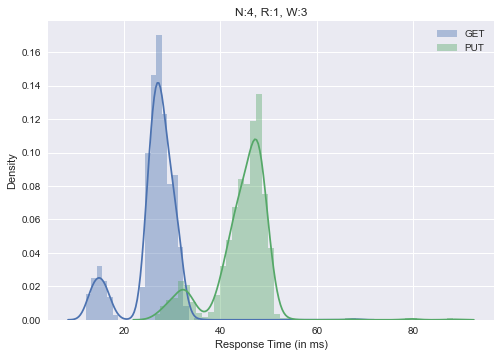

In [38]:
fig = sns.distplot(get_durations, label='GET')
fig = sns.distplot(put_durations, label='PUT')
plt.ylabel('Density')
plt.xlabel('Response Time (in ms)')
plt.title('N:4, R:1, W:3')
plt.legend()
plt.show()

## With failures

In [30]:
import logging
logger = logging.getLogger('dynamo_node')
logger.setLevel(logging.INFO)
# logger.propagate = False

In [6]:
def get_start_port(randomize=True, failed_port=None):
    new_port = START_PORT + randint(0, params.num_proc-1) * int(randomize)
    while failed_port is not None and new_port == failed_port:
        new_port = START_PORT + randint(0, params.num_proc-1) * int(randomize)
    return new_port

def run_multiple_get(total, num_requests, get_durations=None, failed_port=None):
    durations, responses = [], []
    for i in tqdm(range(total // num_requests)):
        requests = [client_get]*num_requests
        key = randint(0, 2**params.hash_size-1)
        while (key >= 0 and key <= 16) or (key >= 160 and key <= 176):
            # dont want a key to go to a failed coordinator node
            key = randint(0, 2**params.hash_size-1)                             
        requests_params = [{'port': get_start_port(failed_port=failed_port), 'client_id': CLIENT_ID, 'key': key} for _ in range(num_requests)]
        _durations, _responses = run_parallel(requests, requests_params, start_port=START_PORT, as_np=False)
        print(len(_durations))
        durations.extend(_durations)
        responses.extend(_responses)
    return durations, responses

In [7]:
from client_dynamo import client_fail

# START_PORT
# mem1, replic_mem = client_get_memory(START_PORT)

client_fail(START_PORT)

INFO:dynamo_node:Node 0 is set to fail=True


In [9]:
response = client_put(START_PORT+1, CLIENT_ID, 0, "0")
print(response)

response = client_get(START_PORT+1, CLIENT_ID, 0)
print(response)

INFO:dynamo_node:[Put] called for key 0 at node 1
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:Put sending a response back server_id: 1
metadata: "needs to reroute !"
reroute: true
reroute_server_id: 2336

INFO:dynamo_node:[Put] called for key 0 at node 3
INFO:dynamo_node:Replicating.... key=0, val=0
INFO:dynamo_node:Tokens in pref_list are [0, 1, 2, 4], and Nodes in pref_list are [3, 5, 4, 1]
INFO:dynamo_node:[Replicate] called for key 0 at node 4
INFO:dynamo_node:[Replicate] called for key 0 at node 5
INFO:dynamo_node:[Replicate] called for key 0 at node 1
INFO:dynamo_node:Writes done !
INFO:dynamo_node:ITRS: Writes to 2 nodes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Writes done !
INFO:dynamo_node:Replicated at 1
INFO:dynamo_node:Put request has been successfully replicated :) 
INFO:dynamo_node:-----w is 2 and W is 3-----
INFO:dynamo_node:ITRS: Writes to 3 nodes done !
INFO:dynamo_node:Replicated at 4
INFO:dynamo_node:-----w is 3 and W is 3-----
INFO:dynamo_no

INFO:dynamo_node:Put sending a response back server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

INFO:dynamo_node:[GET] called by client 1 for key: 0 at node 1 at port 2334
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:[GET] called by client 1 for key: 0 at node 3 at port 2336
INFO:dynamo_node:[Coordinate READ]Pref list at 2336 is [0, 1, 2, 4]


server_id: 3
metadata: "Replicated"
reroute_server_id: -1
succ: true

server_id: 3
items {
  val: "0"
  context {
    clock {
      server_id: "3"
      count: 1
    }
  }
}
metadata: "success"
reroute_server_id: -1
succ: true



INFO:dynamo_node:[Read] called for key 0 at node 5 at port 2338
INFO:dynamo_node:[Read] called for key 0 at node 4 at port 2337
INFO:dynamo_node:[Read] called for key 0 at node 1 at port 2334
INFO:dynamo_node:[READ callback] Successful 2 / 1
INFO:dynamo_node:[READ callback] Successful 3 / 1
INFO:dynamo_node:[READ callback] Successful 4 / 1
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:Get request has been successfully replicated :) 


In [8]:
# get_fail_durations = np.array([])
get_fail_durations, responses = run_multiple_get(30, 10, None, START_PORT)

INFO:dynamo_node:[GET] called by client 1 for key: 21 at node 6 at port 2339
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:[GET] called by client 1 for key: 21 at node 3 at port 2336
INFO:dynamo_node:[Coordinate READ]Pref list at 2336 is [1, 2, 3, 4]
INFO:dynamo_node:[Read] called for key 21 at node 5 at port 2338
INFO:dynamo_node:[Read] called for key 21 at node 2 at port 2335
INFO:dynamo_node:[Read] called for key 21 at node 7 at port 2340
INFO:dynamo_node:[GET] called by client 1 for key: 21 at node 1 at port 2334
INFO:dynamo_node:[READ callback] Successful 2 / 4
INFO:dynamo_node:[READ callback] Successful 3 / 4
INFO:dynamo_node:Rerouting to 2336...
INFO:dynamo_node:[READ callback] Successful 4 / 4
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:[GET] called by client 1 for key: 21 at node 3 at port 2336
INFO:dynamo_node:[Coordinate READ]Pref list at 2336 is [1, 2, 3, 4]
INF

INFO:dynamo_node:Rerouting to 2334...


10 [0.030190229415893555, 0.036898136138916016, 0.03505420684814453, 0.037017822265625, 0.034600257873535156, 0.03865408897399902, 0.0384979248046875, 0.04076385498046875, 0.023571014404296875, 0.022906780242919922]
10


INFO:dynamo_node:[GET] called by client 1 for key: 193 at node 1 at port 2334
INFO:dynamo_node:[Coordinate READ]Pref list at 2334 is [12, 13, 14, 2]
INFO:dynamo_node:[Read] called for key 193 at node 3 at port 2336
INFO:dynamo_node:[Read] called for key 193 at node 7 at port 2340
INFO:dynamo_node:[GET] called by client 1 for key: 193 at node 3 at port 2336
INFO:dynamo_node:[Read] called for key 193 at node 5 at port 2338
INFO:dynamo_node:[READ callback] Successful 2 / 4
INFO:dynamo_node:[READ callback] Successful 3 / 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:[READ callback] Successful 4 / 4
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:[GET] called by client 1 for key: 193 at node 1 at port 2334
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:[GET] called by client 1 for key: 93 at node 7 at port 2340
INFO:dynamo_node:[Coordinate READ]

timeout
2 [0.04108691215515137, 0.40166592597961426]
2


INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:[Read] called for key 193 at node 3 at port 2336
INFO:dynamo_node:[Read] called for key 193 at node 7 at port 2340
INFO:dynamo_node:[Read] called for key 193 at node 5 at port 2338
INFO:dynamo_node:[GET] called by client 1 for key: 193 at node 5 at port 2338
INFO:dynamo_node:[GET] called by client 1 for key: 93 at node 4 at port 2337
INFO:dynamo_node:[READ callback] Successful 2 / 4
INFO:dynamo_node:[READ callback] Successful 3 / 4
INFO:dynamo_node:[READ callback] Successful 4 / 4
INFO:dynamo_node:Rerouting to 2334...
INFO:dynamo_node:[Coordinate READ]Pref list at 2337 is [5, 6, 7, 8]


timeout
0 []
0



INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:[GET] called by client 1 for key: 193 at node 1 at port 2334
INFO:dynamo_node:[Read] called for key 93 at node 5 at port 2338
INFO:dynamo_node:[Read] called for key 93 at node 6 at port 2339
INFO:dynamo_node:[GET] called by client 1 for key: 93 at node 6 at port 2339
INFO:dynamo_node:[Read] called for key 93 at node 2 at port 2335
INFO:dynamo_node:[Coordinate READ]Pref list at 2334 is [12, 13, 14, 2]
INFO:dynamo_node:[READ callback] Successful 2 / 4
INFO:dynamo_node:[READ callback] Successful 3 / 4
INFO:dynamo_node:Rerouting to 2337...
INFO:dynamo_node:[READ callback] Successful 4 / 4
INFO:dynamo_node:Get request has been successfully replicated :) 
INFO:dynamo_node:[Read] called for key 193 at node 3 at port 2336
INFO:dynamo_node:[Read] called for key 193 at node 7 at port 

In [9]:
get_fail_durations = np.array(get_fail_durations)

get_fail_durations.shape

(12,)

In [10]:
len(get_fail_durations)

12

In [11]:
get_fail_durations*1000

array([ 30.19022942,  36.89813614,  35.05420685,  37.01782227,
        34.60025787,  38.65408897,  38.4979248 ,  40.76385498,
        23.5710144 ,  22.90678024,  41.08691216, 401.66592598])

In [14]:
len(responses)

14

In [15]:
get_durations.shape

(0,)

In [16]:
test = [0.029925823211669922, 0.03148627281188965, 0.031996965408325195, 0.03176593780517578, 0.031462907791137695, 0.030453920364379883, 0.03252911567687988, 0.0177609920501709, 0.1620798110961914, 0.2121727466583252, 0.22617697715759277, 0.2506279945373535, 0.24697089195251465, 0.29291319847106934, 0.4482302665710449, 0.40848278999328613, 0.48263120651245117]

In [2]:
len(test)

17